In [274]:
import time
import numpy as np
from PIL import Image

In [275]:
imarr=np.array(Image.open('lena.gif').convert('L'))

In [276]:
lookup = np.array([
            [0, 7, 13, 10],
            [1, 6, 12, 11],
            [4, 2, 9, 15],
            [5, 3, 8, 14]], dtype=np.uint8)

In [277]:
from embedding import watermark_embedding
embedded=watermark_embedding(imarr, lookup).imarr
embedded.shape

(512, 512)

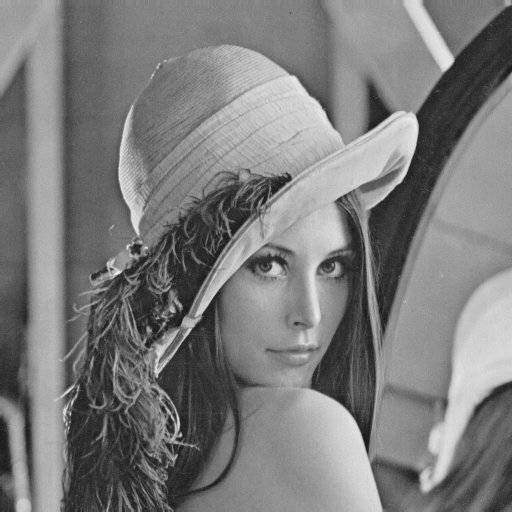

In [278]:
Image.fromarray(embedded)

In [279]:
from utils import psnr
psnr(imarr, embedded)

44.2891495574522

In [280]:
# save
Image.fromarray(embedded).save('lena_embedded.png')

In [281]:
# raise Exception("stop")

temper img

In [282]:
startx = 200
starty = 200
width = 50
height = 50

for i in range(width):
    for j in range(height):
        embedded[startx+i][starty+j] = 0

In [283]:
startx = 100
starty = 100
width = 50
height = 50

for i in range(width):
    for j in range(height):
        embedded[startx+i][starty+j] = 0

In [284]:
imarr=embedded.copy()

Recovrey

In [285]:
# imarr=np.array(Image.open('lena_embedded_edited.png').convert('L'))

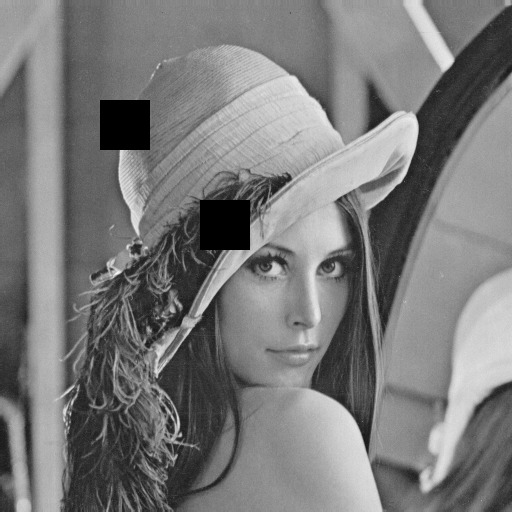

In [286]:
Image.fromarray(imarr)

In [287]:
from authentication import watermark_authentication
tempred=watermark_authentication(imarr).tempred
tempred.shape,tempred

((16, 64),
 array([[False, False, False, ..., False,  True,  True],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]))

In [288]:
from recoverybits import extract
recovery_bits=extract.extract(embedded)
recovery_bits.shape

(16, 24576)

In [ ]:
# raise Error

In [125]:
recovery_bits

array([[0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 1, 1]], dtype=uint8)

In [121]:
lookup

array([[ 0,  7, 13, 10],
       [ 1,  6, 12, 11],
       [ 4,  2,  9, 15],
       [ 5,  3,  8, 14]], dtype=uint8)

In [95]:
partner=0
id=0
np.any(tempred[lookup[partner,id]])

True

In [96]:
partner_block = -1
for i in range(lookup[partner].shape[0]):
    # if this id isn't tempred, we can stop
    if i != id and not np.any(tempred[lookup[partner,i]]):
        partner_block = partner,i
        break

In [97]:
partner_block, (partner,id)

((0, 1), (0, 0))

In [98]:
idx = id
if partner_block[1] < id:
  idx -= 1
idx

0

In [99]:


# now we have partner_block, so we can recover it
# get the recovery bits of this partner block
recovery_bits_partner = recovery_bits[lookup[partner_block],
                                  idx*recovery_bits.shape[1]//3:idx+recovery_bits.shape[1]//3]

# now we have recovrey bits the exact partner block
# but these are in binary, so we need to convert them to uint
recovery_decimals = np.packbits(recovery_bits_partner)

In [100]:
recovery_bits.shape

(16, 24576)

In [101]:
recovery_bits_partner.shape

(8192,)

In [102]:
recovery_decimals.shape

(1024,)

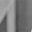

In [103]:
Image.fromarray(recovery_decimals.reshape(32,32))

In [25]:
recovery_decimals=recovery_decimals.reshape(16,-1)
recovery_decimals.shape

(16, 64)

In [26]:
Image.fromarray(recovery_decimals)

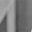

In [27]:
Image.fromarray(recovery_decimals.reshape(32,32))

In [28]:
import math

In [29]:
newshape=recovery_decimals.shape[0]*recovery_decimals.shape[1]*4*4
newshape, math.sqrt(newshape)

(16384, 128.0)

In [30]:
from blocks import get_blocks, combine_blocks


In [31]:
# making 16 main blocks
# size of single main block S= M/sqrt(16) X T=N/sqrt(16)
# e.g for lena the 512x512 the partner blocks size would be 16 blocks each with size (512x512)/(4x4) = 128x128
mainblock_shape = (int(imarr.shape[0]/4), int(imarr.shape[1]/4))
mainblocks = get_blocks(imarr.copy(), mainblock_shape)

# here the main blocks are like this index.
# 1st index is the block number.
# 2nd index is the channel (RGB) or 0 in Grey.
# 3rd and 4th are for indexing the block.

# Making 16x16 for Step 8
# Dividing the main blocks to 16x16 blocks
# Total blocks = SxT/16x16 = 128x128/16x16 = 64 Blocks

b16x16_shape = (16, 16)
# reshaping because we needed that shape
b16x16 = mainblocks.reshape(
  *mainblocks.shape[:-2],
  int((mainblock_shape[0]*mainblock_shape[1]) /
      (b16x16_shape[0]*b16x16_shape[1])),
  b16x16_shape[0], b16x16_shape[1]).copy()

for i in range(mainblocks.shape[0]):
  b16x16[i][0] = get_blocks(mainblocks[i][0], b16x16_shape,
                            addChannel=False)

In [32]:
Image.fromarray(b16x16[0][0][0])

In [76]:
b16x16.shape

(16, 1, 64, 16, 16)

In [33]:
b16x16[0][0][0].shape

(16, 16)

In [37]:
b4x4.shape

(16, 4, 4)

In [38]:
r4x4=get_blocks(recovery_decimals.reshape(32,32), (4,4))

In [39]:
recovery_decimals.shape

(16, 64)

In [51]:
import scipy.ndimage

In [110]:
b16x16.shape

(16, 1, 64, 16, 16)

In [108]:
tempred.shape

(16, 64)

In [106]:
int(imarr.shape[0]/(4*4))

32

In [45]:
Image.fromarray(recovery_decimals)

In [72]:
x=scipy.ndimage.zoom(recovery_decimals.reshape(32,32), 4, order=0)
x.shape

(128, 128)

In [77]:
r4x4=get_blocks(x, (16,16), addChannel=False)
r4x4.shape

(64, 16, 16)

In [78]:
Image.fromarray(r4x4[0])

In [40]:
r4x4.shape

(64, 1, 4, 4)

In [ ]:
r4x4

In [ ]:
Image.fromarray

In [ ]:
start_t = time.time()

recoveredarr = imarr.copy()

for partner in lookup:  # A,B,C,D
    for id in partner:  # A1,A2,A3.....D4 etc
        # check if this is tempred
        if np.any(tempred[id]):
            # this mainblock is tempred, so we need to recover it
            # but which 16x16 block is tempred?

            # get the partner block of this id also the id it sits
            partner_block = -1
            for pb in partner:
                # if this id isn't tempred, we can stop
                if pb != id and not np.any(tempred[pb]):
                    partner_block = pb
                    break

            if partner_block == -1:
                print(
                    "Could not find partner block for id {}".format(id))
                continue

            # get recovery bits of this id
            # get index of this id in the partner block
            idx = partner_block
            if partner_block < id:
                idx -= 1

            # now we have partner_block, so we can recover it
            # get the recovery bits of this partner block
            recovery_bits_partner = recovery_bits[partner_block,
                                                  idx*recovery_bits.shape[1]//3:idx+recovery_bits.shape[1]//3]

            # now we have recovrey bits the exact partner block
            # but these are in binary, so we need to convert them to uint
            recovery_decimals = np.packbits(recovery_bits_partner)

            # these recovery bits are for all the main blocks 4x4
            # but we are going to replace only the tempred 16x16
            

In [ ]:
recovery_decimals

In [289]:
from typing import NamedTuple
import numpy as np
import scipy.ndimage
import time
from blocks import get_blocks, combine_blocks
from recoverybits import make as recoverybits_make, embed as recoverybits_embed, extract as recoverybits_extract
from authbits import make as authbits_make, embed as authbits_embed, extract as authbits_extract



In [290]:
imarr.shape, recovery_bits.shape, tempred.shape

((512, 512), (16, 24576), (16, 64))

In [291]:

start_t = time.time()

recoveredarr = imarr.copy()

In [292]:



# only do if any of the blocks are tempred
# if np.any(tempred):

# converting the image to 16x16 blocks
# making 16 main blocks
# size of single main block S= M/sqrt(16) X T=N/sqrt(16)
# e.g for lena the 512x512 the partner blocks size would be 16 blocks each with size (512x512)/(4x4) = 128x128
mainblock_shape = (int(imarr.shape[0]/4), int(imarr.shape[1]/4))
mainblocks = get_blocks(imarr.copy(), mainblock_shape)

# here the main blocks are like this index.
# 1st index is the block number.
# 2nd index is the channel (RGB) or 0 in Grey.
# 3rd and 4th are for indexing the block.

# Making 16x16 for Step 8
# Dividing the main blocks to 16x16 blocks
# Total blocks = SxT/16x16 = 128x128/16x16 = 64 Blocks

b16x16_shape = (16, 16)
# reshaping because we needed that shape
b16x16 = mainblocks.reshape(
    *mainblocks.shape[:-2],
    int((mainblock_shape[0]*mainblock_shape[1]) /
        (b16x16_shape[0]*b16x16_shape[1])),
    b16x16_shape[0], b16x16_shape[1]).copy()

for i in range(mainblocks.shape[0]):
    b16x16[i][0] = get_blocks(mainblocks[i][0], b16x16_shape,
                                addChannel=False)

for partner in range(lookup.shape[0]):  # A,B,C,D
    for id in range(lookup.shape[1]):  # A1,A2,A3.....D4 etc
        # check if this is tempred
        if np.any(tempred[lookup[partner, id]]):
            # this mainblock is tempred, so we need to recover it
            # but which 16x16 block is tempred?

            # get the partner block of this id also the id it sits
            partner_block = -1, -1
            for i in range(lookup[partner].shape[0]):
                # if this id isn't tempred, we can stop
                if i != id and not np.any(tempred[lookup[partner, i]]):
                    partner_block = partner, i
                    break

            if partner_block == (-1, -1):
                print(
                    "Could not find partner block {} for id {}".format(partner,id))
                continue

            # get recovery bits of this id
            # get index of this id in the partner block
            idx = id
            if partner_block[1] < id:
                idx -= 1

            # now we have partner_block, so we can recover it
            # get the recovery bits of this partner block
            recovery_bits_partner = recovery_bits[lookup[partner_block],
                                                    idx*recovery_bits.shape[1]//3:idx*recovery_bits.shape[1]//3+recovery_bits.shape[1]//3]

            # now we have recovrey bits the exact partner block
            # but these are in binary, so we need to convert them to uint
            recovery_decimals = np.packbits(recovery_bits_partner)

            # these recovery bits are for all the main blocks 4x4
            # but we are going to replace only the tempred 16x16

            # shaping these recovery bits to the 16x16 blocks
            r16x16 = get_blocks(scipy.ndimage.zoom(recovery_decimals.reshape(int(
                imarr.shape[0]/(4*4)), int(imarr.shape[1]/(4*4))), 4, order=0), b16x16_shape, addChannel=False)

            # now we repace which ever 16x16 block is tempred
            for i in range(tempred[lookup[partner, id]].shape[0]):
                if tempred[lookup[partner, id], i]:
                    # means this 16x16 block is tempred
                    b16x16[lookup[partner, id], 0, i] = r16x16[i]

# combining the 16x16 blocks to the main blocks
# merging 16x16
cmainblocks = mainblocks.copy()
for i in range(cmainblocks.shape[0]):
    cmainblocks[i][0] = combine_blocks(
        b16x16[i][0], mainblock_shape, blockshape=b16x16_shape, channel=False)

# merging main blocks to main image
recoveredarr = combine_blocks(cmainblocks.copy(), imarr.shape,
                                mainblock_shape).reshape(imarr.shape)



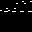

In [293]:
Image.fromarray(tempred.reshape(32,32))

In [294]:
recovery_bits[0].shape

(24576,)

In [295]:
idx*recovery_bits.shape[1]//3,idx*recovery_bits.shape[1]//3+recovery_bits.shape[1]//3

(0, 8192)

In [296]:
recovery_bits[lookup[partner_block],
                                                    idx*recovery_bits.shape[1]//3:idx+recovery_bits.shape[1]//3]

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [297]:
recovery_decimals

array([154, 102, 102, ..., 171, 188, 127], dtype=uint8)

In [298]:
recovery_bits.shape[1]//3

8192

In [299]:
partner, id, idx, partner_block

(3, 3, 0, (3, 1))

In [300]:
lookup

array([[ 0,  7, 13, 10],
       [ 1,  6, 12, 11],
       [ 4,  2,  9, 15],
       [ 5,  3,  8, 14]], dtype=uint8)

In [301]:
idx

0

In [302]:
recoveredarr.shape

(512, 512)

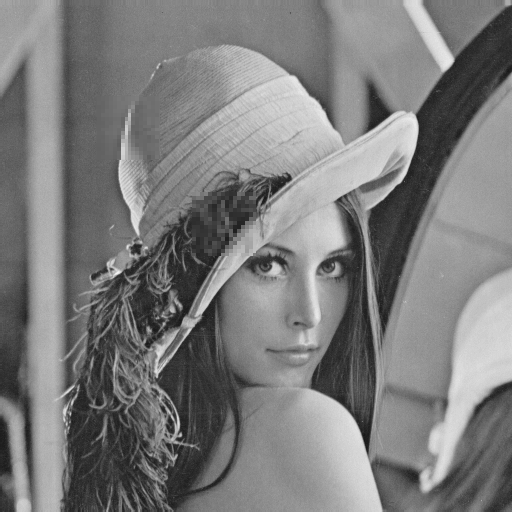

In [303]:
Image.fromarray(recoveredarr.astype(np.uint8))